# Deeper dive into pandas

### Data & file types
- **text**: .txt, .csv, .doc, .odt ...
- **numbers**: .csv, xlsx ...
- **images**: .png, .tiff, .jpeg ...
- **sound**: .mp3, .ogg, .wav ... 
- **video**: .mp4, .mpeg, .avi,  ...  
etc...

Possible sources: 
- database
- files
- scrapping data from web pagess
- downloading data from api eg. twitter, spotify
- geographical data
- sensors
- scientific equipment    
etc.. 

## Data import

In [1]:
import pandas as pd

other functions for importing in pandas:  
https://pandas.pydata.org/docs/search.html?q=read_

In [2]:
df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')

#### pd.read_csv()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

### Data exploration

In [3]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855


In [4]:
df.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,1192,1252,1271,1298,1336,1360,1371,1433,1442,1476
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,760,796,835,869,894,901,920,950,982,1016
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,227,253,263,274,290,298,315,325,339,395
3339,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,338,346,353,355,364,366,372,372,383,386


#### Some conclusions: 

- 320 columns, 3340 entries
- No extra lines in start and end of file
- Many columns are dates, increamenting by one day at a time. 
- Data end on Nov. 25 2020
- Contain geographical information:  country - province - county + latitude & longitude
- We can see an entry (3337) with many zeroes 

## Missing data
If data is missing, the field will have a NaN value (Not a Number) - the equivalent of null in SQL. 

#### `.isnull()`  / `.isna()`  check for null values and returns True or False

In [5]:
df.isnull()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Quick assginment
Find columns with null values

In [6]:
null_in_column = df.isnull().sum()
null_in_column[null_in_column > 0]

FIPS      10
Admin2     6
dtype: int64

There is very little data missing. 
Let's examine them closer.

In [7]:
df[df.FIPS.isnull()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
1267,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,...,433,446,465,475,486,496,508,519,524,528
1304,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,...,197,197,197,197,198,199,199,199,199,199
1336,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,...,9421,9527,9573,9947,10859,11730,11730,11825,11870,11882
1591,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,...,19360,19645,20045,20337,20658,21042,21420,21608,21884,22183
2954,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,...,7763,7897,8082,8365,8634,8962,9129,9271,9376,9451
2959,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,2210,2254,2360,2471,2556,2668,2720,2779,2849,2881
2978,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,929,962,1011,1054,1097,1139,1156,1175,1209,1248
2979,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,8945,9228,9459,9678,10037,10370,10470,10686,10911,11066
2982,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,987,1037,1102,1136,1195,1245,1277,1289,1327,1349
2990,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,10230,10451,10710,10968,11350,11576,11786,11987,12112,12255


In [8]:
df[df.Admin2.isna()][df.columns[:12]]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
100,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0
336,84088888,US,USA,840,88888.0,NaN,Diamond Princess,US,0.0000,0.0000,"Diamond Princess, US",0
570,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,"Grand Princess, US",0
571,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0
2121,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0
3007,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0


All other values appear to be present.  
We have no reason to remove the rows with missing values from the dataset.   
We can however substitute the null value, with a value of our choice

#### `df.fillna()`
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

### Quick assginment
Apply .fillna() to 'FIPS' and  'Admin2'

In [9]:
values_to_use = {'FIPS': -1, 'Admin2': 'Unassigned'}
df.fillna(value=values_to_use, inplace=True)

In [10]:
df[df.Admin2.isna()][df.columns[:12]]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20


### Keep exploring

In [11]:
# find where date entries start
df.columns[:15]

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20'],
      dtype='object')

In [12]:
# see content of columns that are not dates
df[df.columns[:11]].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US"
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US"
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US"
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US"
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US"


#### `.nunique()`    get number of unique values in a column
In this dataset, it doesn't make sense to check number of unique values in date columns.    
We will limit our search to categorical columns 

In [13]:
df.Province_State.nunique()

58

### Quick assginment
Apply .nunique() to columns of interest

In [14]:
nunique = [(col, df[col].nunique()) for col in df.columns[:11]]
nunique

[('UID', 3340),
 ('iso2', 6),
 ('iso3', 6),
 ('code3', 6),
 ('FIPS', 3331),
 ('Admin2', 1978),
 ('Province_State', 58),
 ('Country_Region', 1),
 ('Lat', 3226),
 ('Long_', 3226),
 ('Combined_Key', 3340)]

#### `.unique()`    get unique values in a column

In [15]:
iso2 = df.iso2.unique()
iso2

array(['US', 'AS', 'GU', 'MP', 'PR', 'VI'], dtype=object)

### Quick assginment
Apply .unique() to 'iso3' and 'code3'    
Use dot and bracket notation respectively 

In [16]:
iso3 = df.iso3.unique()
iso3

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [17]:
code3 = df['code3'].unique()
code3

array([840,  16, 316, 580, 630, 850])

You need to understand your data.   
Google it!  https://unstats.un.org/unsd/tradekb/knowledgebase/country-code

ASM American Samoa  
GUM Guam  
MNP Northern Mariana Islands  
PRI Puerto Rico  
VIR Virgin Islands, U.S.

In [18]:
nunique

[('UID', 3340),
 ('iso2', 6),
 ('iso3', 6),
 ('code3', 6),
 ('FIPS', 3331),
 ('Admin2', 1978),
 ('Province_State', 58),
 ('Country_Region', 1),
 ('Lat', 3226),
 ('Long_', 3226),
 ('Combined_Key', 3340)]

iso2, iso3 and code3 have the same number of unique entries.  
Are only the same combinations present, or multiple combinations are possible?  
We care because if it's always the same combination, then we have the same data three times.

To answer this question, we need to check all possible combinations (6^3 = 216)

In [19]:
to_combine = [iso2, iso3, code3]
to_combine

[array(['US', 'AS', 'GU', 'MP', 'PR', 'VI'], dtype=object),
 array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object),
 array([840,  16, 316, 580, 630, 850])]

In [20]:
import itertools

In [21]:
all_possible_combinations = [el for el in itertools.product(*to_combine)]
len(all_possible_combinations)

216

In [22]:
all_possible_combinations[-5:]

[('VI', 'VIR', 16),
 ('VI', 'VIR', 316),
 ('VI', 'VIR', 580),
 ('VI', 'VIR', 630),
 ('VI', 'VIR', 850)]

In [23]:
# which combinations appear in the dataframe
actual_combinations = []

for el in all_possible_combinations:
    _ = df[(df.iso2 == el[0]) & 
           (df.iso3 == el[1]) & 
           (df.code3 == el[2])].shape[0]
    
    if _ > 0:
        actual_combinations.append((el, _))
        
actual_combinations

[(('US', 'USA', 840), 3256),
 (('AS', 'ASM', 16), 1),
 (('GU', 'GUM', 316), 1),
 (('MP', 'MNP', 580), 1),
 (('PR', 'PRI', 630), 80),
 (('VI', 'VIR', 850), 1)]

So we can delete two columns, without losing information.

The 'UID' column, probably corresponds to a unique ID, which in our case is not relevant. We can also delete it.   
The 'Combined_Key' column, is a combinations of the columns 'Admin2', 'Province_state', 'Country_region'. Again, for our analyis, there is no reason to keep it. 

#### `.drop()`   delete selected rows/columns
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

### Quick assginment
Apply drop() to 'iso2', 'code3', 'UID', 'Combined_Key' 

In [24]:
df.drop(columns=['iso2', 'code3', 'UID', 'Combined_Key'], inplace=True)

In [25]:
df.columns[:10]

Index(['iso3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat',
       'Long_', '1/22/20', '1/23/20', '1/24/20'],
      dtype='object')

### Outliers

#### Let's examine entries with 0 latitude & longitude

In [26]:
df[df.Lat == 0]

,iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
52,USA,80001.0,Out of AL,Alabama,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,USA,90001.0,Unassigned,Alabama,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,USA,80002.0,Out of AK,Alaska,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,USA,90002.0,Unassigned,Alaska,US,0.0,0.0,0,0,0,...,106,112,112,115,118,122,129,129,132,138
111,USA,80004.0,Out of AZ,Arizona,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,USA,90054.0,Unassigned,West Virginia,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3285,USA,80055.0,Out of WI,Wisconsin,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3304,USA,90055.0,Unassigned,Wisconsin,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3329,USA,80056.0,Out of WY,Wyoming,US,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Apparently it's possible to have 0 Lat/Long but still have entries in the dates.   
So we don't want to just delete any entry with a 0 Lan/Long.

#### Let's find if there are rows where all entries in dates are equal to 0

In [27]:
# part of dataframe with dates
df_dates = df[df.columns[7:]]
df_dates.head(2) 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
0,0,0,0,0,0,0,0,0,0,0,...,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686
1,0,0,0,0,0,0,0,0,0,0,...,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473


In [28]:
all_days_zero = [el for el in df_dates.sum(axis=1) if el==0]
len(all_days_zero)

65

#### `df.iloc[ ]`  `df.loc[ ]`    Recommended methods of indexing.   
- .loc if you want to label index.  
- .iloc if you want to positionally index.  

Documentation on indexing and selecting data: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [29]:
df_dates.loc[:, '11/25/20']

0       2686
1       8473
2       1170
3       1162
4       2855
        ... 
3335    1476
3336    1016
3337       0
3338     395
3339     386
Name: 11/25/20, Length: 3340, dtype: int64

In [30]:
# iloc[index number, column number] : element
df_dates.iloc[0, 308]

2686

### Quick assginment
- Use .loc to get the contents of the first row  
- Use .iloc to get the contents of the last column

In [31]:
# loc[index label] : contents of entire row
df_dates.loc[0]

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
            ... 
11/21/20    2597
11/22/20    2617
11/23/20    2634
11/24/20    2661
11/25/20    2686
Name: 0, Length: 309, dtype: int64

In [32]:
# iloc[:, column number] : contents of entire column
df_dates.iloc[:,308]

0       2686
1       8473
2       1170
3       1162
4       2855
        ... 
3335    1476
3336    1016
3337       0
3338     395
3339     386
Name: 11/25/20, Length: 3340, dtype: int64

Let's check a couple of these locations

#### `df.at[ ]` , `df.iat[ ]`  Fast scalar value getting and setting

In [33]:
df.at[all_days_zero[5], 'Lat']

32.53952745

In [34]:
df.at[all_days_zero[5], 'Lat'] = 5000

In [35]:
df.at[all_days_zero[5], 'Lat']

5000.0

In [36]:
# set it to original value
df.at[all_days_zero[5], 'Lat'] = -14.271

### Quick assginment
Use .at[ ] to get the longitude at the fifth row

In [37]:
df.at[all_days_zero[5], 'Long_']

-86.64408227

5: https://www.google.com/maps/place/14%C2%B016'15.6%22S+170%C2%B007'55.2%22W/@-14.271,-170.1330943,18z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d-14.271!4d-170.132

25: https://www.google.com/maps/place/41%C2%B017'39.1%22N+70%C2%B005'15.9%22W/@41.2942019,-70.089936,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d41.2942019!4d-70.0877473

They seem to be places that are not habitable.  
We can procced to remove them from the data. 

In [38]:
df.drop(index=all_days_zero, inplace=True)

## Duplicate entries

#### `.duplicated()`   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [39]:
a = pd.DataFrame({'a': [1,1,3,4,1], 
                  'b': [2,2,4,5,2]})
a

,a,b
0,1,2
1,1,2
2,3,4
3,4,5
4,1,2


In [40]:
ad = a.duplicated()
ad

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [41]:
ad.sum()

2

### Quick assginment
Use .duplicated() to find if there are duplicate entries in the dataframe 

In [42]:
df.duplicated().sum()

0

#### `.drop_duplicates()`  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [43]:
a.drop_duplicates()

,a,b
0,1,2
2,3,4
3,4,5


### Indexing with `isin()`
Useful for the cases when you don’t know which of the sought labels are in fact present

In [44]:
provinces = {'Admin2': ['Berlin', 'Baldwin', 'Bibb', 'Cherokee', 'Coffee', 'Hamburg']}

In [45]:
df.isin(provinces)

,iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
df[df['Admin2'].isin(['Berlin', 'Hamburg', 'Baldwin', 'Bibb', 'Cherokee', 'Coffee'])]

,iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
1,USA,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,...,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
3,USA,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,...,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
9,USA,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,0,0,0,...,912,919,935,956,959,979,985,989,996,1008
15,USA,1031.0,Coffee,Alabama,US,31.399328,-85.989010,0,0,0,...,2180,2195,2223,2246,2265,2281,2303,2334,2366,2397
413,USA,13009.0,Baldwin,Georgia,US,33.068823,-83.247017,0,0,0,...,2533,2559,2573,2578,2590,2595,2598,2605,2617,2633
419,USA,13021.0,Bibb,Georgia,US,32.809042,-83.704892,0,0,0,...,7231,7255,7304,7324,7361,7392,7403,7423,7466,7487
436,USA,13057.0,Cherokee,Georgia,US,34.243940,-84.474319,0,0,0,...,9144,9303,9401,9515,9602,9895,10010,10047,10184,10274
442,USA,13069.0,Coffee,Georgia,US,31.548930,-82.854921,0,0,0,...,2713,2741,2758,2780,2802,2830,2834,2839,2859,2884
840,USA,19035.0,Cherokee,Iowa,US,42.735389,-95.623894,0,0,0,...,650,671,680,696,721,732,748,762,781,798
934,USA,20021.0,Cherokee,Kansas,US,37.169285,-94.846290,0,0,0,...,931,931,999,999,1023,1023,1042,1070,1070,1093


## Chained indexing: to be avoided
especially when you're in the data transformation part of your analysis. 

In [47]:
b = pd.DataFrame({'a':[1, 'b', 2, 0.5], 'b':[5, 'c', 2, 1.3]})
b

,a,b
0,1,5
1,b,c
2,2,2
3,0.5,1.3


In [48]:
b.at[0, 'b']

5

In [49]:
# this is a simple example of chained indexing
b['b'][0]

5

We can't know if it returns a copy or a reference. So you can't be sure if your change will be applied to the dataframe

In [50]:
b['b'][0] = 'b'

In [51]:
b

,a,b
0,1,b
1,b,c
2,2,2
3,0.5,1.3


The order and type of the indexing operation partially determine whether the result is a slice into the original object, or a copy of the slice

Pandas has a ` SettingWithCopyWarning` . They can be false positive.

In [52]:
df.head()

,iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
1,USA,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,...,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473
2,USA,1005.0,Barbour,Alabama,US,31.868263,-85.387129,0,0,0,...,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170
3,USA,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,...,993,1004,1008,1011,1024,1036,1136,1142,1157,1162
4,USA,1009.0,Blount,Alabama,US,33.982109,-86.567906,0,0,0,...,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855
5,USA,1011.0,Bullock,Alabama,US,32.100305,-85.712655,0,0,0,...,677,678,678,680,684,688,689,690,690,691


### `groupby( )`

In [53]:
df_province = df.drop(columns=['iso3', 'FIPS', 'Admin2', 'Country_Region', 'Lat','Long_']).groupby(by='Province_State').sum()
df_province.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,216751,218342,220957,223356,225793,228111,229889,231446,234204,236632
Alaska,0,0,0,0,0,0,0,0,0,0,...,24399,25041,25588,26081,26544,27224,27773,28273,28863,29543
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,276912,279896,283102,287225,291696,295334,299665,302324,306868,310850
Arkansas,0,0,0,0,0,0,0,0,0,0,...,134348,135902,137617,139855,141916,143821,145173,146190,148312,150277


### Quick assginment
Use .grouby() on 'Admin2' with average()

### `transpose( )`

In [54]:
df_transposed = df_province.transpose()
df_transposed

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/21/20,228111,27224,0,295334,143821,1105435,194679,101469,31321,49,...,335887,1144424,173979,3546,1491,215679,141260,39598,372219,27410
11/22/20,229889,27773,0,299665,145173,1114524,198600,101469,31808,49,...,340476,1153529,177176,3629,1504,217796,141260,40478,376238,28169
11/23/20,231446,28273,0,302324,146190,1128219,202289,106740,32211,49,...,344550,1162052,179420,3714,1507,221038,147537,41114,379693,29431
11/24/20,234204,28863,0,306868,148312,1145209,206439,107280,32664,49,...,345916,1181533,182121,3762,1521,223582,151019,42083,386441,29959


In [55]:
df_transposed.columns

Index(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='Province_State')

In [56]:
df_transposed.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/16/20', '11/17/20', '11/18/20', '11/19/20', '11/20/20', '11/21/20',
       '11/22/20', '11/23/20', '11/24/20', '11/25/20'],
      dtype='object', length=309)

In [57]:
import matplotlib as plt

In [58]:
import seaborn as sns
sns.set_style('darkgrid')

<AxesSubplot:ylabel='Alabama'>

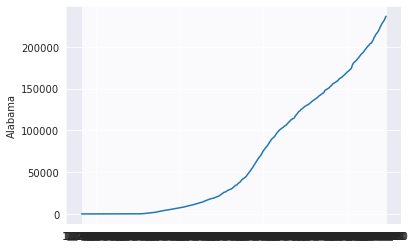

In [59]:
sns.lineplot(data=df_province.loc['Alabama'])